In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from chespex.molecules import Molecule, MoleculeGenerator

In [10]:
def count_length(generator):
    count = 0
    for i in generator.generate():
        count += 1
        if count % 10000 == 0:
            print(count, end="\r")
    print(count)

In [15]:
generator = MoleculeGenerator(5, bead_types='A', number_of_bead_types=7)
count_length(generator)

124327


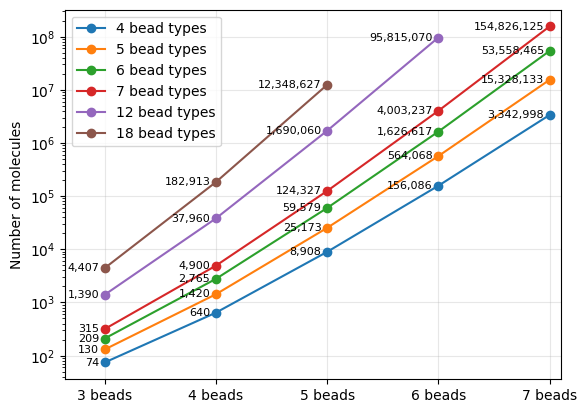

In [16]:
mol_count_data = pd.DataFrame([
	# obtained manually using the above function
	[74, 640, 8908, 156086, 3342998],
	[130, 1420, 25173, 564068, 15328133],
	[209, 2765, 59579, 1626617, 53558465],
	[315, 4900, 124327, 4003237, 154826125],
	[1390, 37960, 1690060, 95815070, np.nan],
	[4407, 182913, 12348627, np.nan, np.nan]
],
columns=['3 beads', '4 beads', '5 beads', '6 beads', '7 beads'],
index=['4 bead types', '5 bead types', '6 bead types', '7 bead types', '12 bead types', '18 bead types']
)
plt.figure()
for i in mol_count_data.index:
	plt.plot(mol_count_data.columns, mol_count_data.loc[i], label=i, marker='o')
	for j, txt in enumerate(mol_count_data.loc[i]):
		if not np.isnan(txt):
			plt.annotate(f'{int(txt):,d}', (j, txt), textcoords='offset points', xytext=(-4,-2), ha='right', fontsize=8)
plt.grid(alpha=0.3)
plt.yscale('log')
plt.legend()
plt.ylabel('Number of molecules')
plt.xlim(-0.36, 4.1)
plt.show()

In [17]:
gen = MoleculeGenerator(7, bead_types='A', number_of_bead_types=18)

In [19]:
bonds = gen._get_bonds_for_bead_list([0,1,2,3,4,5,6])[1]
print(f'Number of different bond configurations: {len(bonds)}')

Number of different bond configurations: 859130


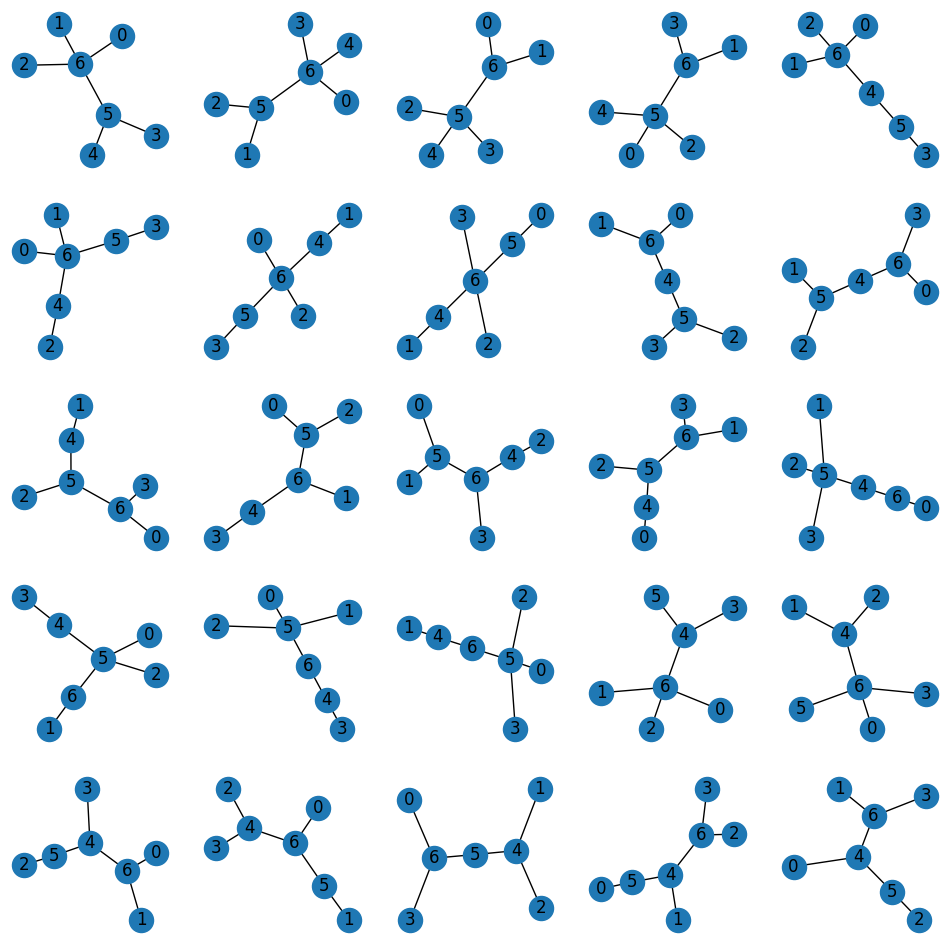

In [20]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(12,12))
for i in range(25):
	nx.draw(nx.from_edgelist(bonds[i*5]), with_labels=True, ax=axs[i//5,i%5])